<a href="https://colab.research.google.com/github/sush2004/Python/blob/main/U_map_%26_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

   Age BusinessTravel  ... YearsSinceLastPromotion  YearsWithCurrManager
0   46  Travel_Rarely  ...                       0                     2
1   37  Travel_Rarely  ...                       0                     2
2   59     Non-Travel  ...                       2                     2
3   54     Non-Travel  ...                       4                     4
4   26  Travel_Rarely  ...                       5                     7

[5 rows x 26 columns]
(1470, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   obje

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   int64 
 8   JobInvolvement           1470 non-null   int64 
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   int64 
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

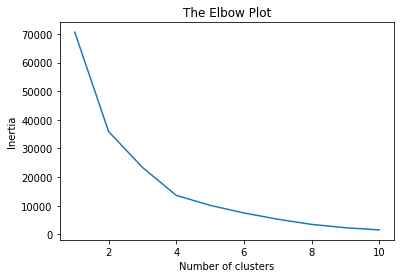

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Importing dataset and examining it
dataset = pd.read_csv("Employees.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

# Converting categorical features to numerical features
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female':0})
dataset['OverTime'] = dataset['OverTime'].map({'Yes': 1, 'No':0})

# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# Dropping columns with high correlation + causation
dataset = dataset.drop(['YearsWithCurrManager','TotalWorkingYears','YearsSinceLastPromotion', 'PercentSalaryHike', 'JobLevel'], axis = 1)
print(dataset.info())
  
# Creating dummy columns
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

# Dividing data into subsets
#Personal Data
subset1 = final_data[['Age','Gender','MaritalStatus_Single','MaritalStatus_Married','MaritalStatus_Divorced','Education','EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','DistanceFromHome']]

#Work Data
subset2 = final_data[['Department_Human Resources','Department_Research & Development','Department_Sales','OverTime','StockOptionLevel','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','PerformanceRating']]

#Life Quality Data
subset3 = final_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance']]

#Potential Churn factors
subset4 = final_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance','OverTime','StockOptionLevel','YearsAtCompany','YearsInCurrentRole','PerformanceRating']]

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)
X4 = feature_scaler.fit_transform(subset4)

1# Analysis on subset1 - Personal Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X1)

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

age = list(dataset['Age'])
gender = list(dataset['Gender'])
marital = list(dataset['MaritalStatus'])
education = list(dataset['Education'])
educationfield = list(dataset['EducationField'])
distance = list(dataset['DistanceFromHome'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Age: {a}; Gender: {b}; MaritalStatus:{c}, Education:{d}, EducationField:{e}, DistanceFromHome:{f}' for a,b,c,d,e,f in list(zip(age,gender,marital,education,educationfield,distance))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()


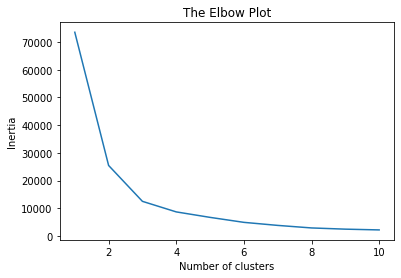

In [ ]:
# Analysis on subset2 - 
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X2)

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_umap)

dept_hr = list(final_data['Department_Human Resources'])
dept_rd = list(final_data['Department_Research & Development'])
dept_sales = list(final_data['Department_Sales'])
yrs_comp = list(final_data['YearsAtCompany'])
yrs_cur_role = list(final_data['YearsInCurrentRole'])
perf_rating = list(final_data['PerformanceRating'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Department_Human Resources: {a}; Department_Research & Development: {b}; Department_Sales:{c}, YearsAtCompany:{d}, YearsInCurrentRole:{e}, PerformanceRating:{f}' for a,b,c,d,e,f in list(zip(dept_hr,dept_rd,dept_sales,yrs_comp,yrs_cur_role,perf_rating))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()


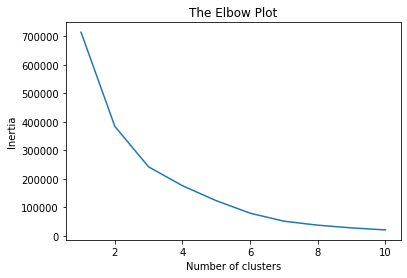

In [ ]:
# Analysis on subset3 - life quality data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X3)

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

job_sat = list(final_data['JobSatisfaction'])
env_sat = list(final_data['EnvironmentSatisfaction'])
job_env = list(final_data['JobInvolvement'])
wrk_bal = list(final_data['WorkLifeBalance'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'JobSatisfaction: {a}; EnvironmentSatisfaction: {b}; JobInvolvement:{c}, WorkLifeBalance:{d}' for a,b,c,d in list(zip(job_sat,env_sat,job_env,wrk_bal))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

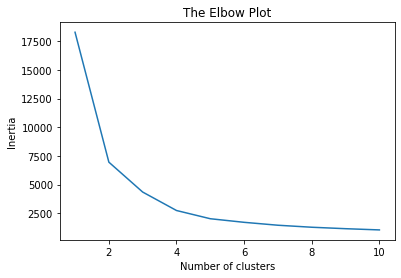

In [39]:
# Analysis on subset4 - Potential churn data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X4)

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

job_sat = list(dataset['JobSatisfaction'])
env_sat = list(dataset['EnvironmentSatisfaction'])
job_env = list(dataset['JobInvolvement'])
wrk_bal = list(dataset['WorkLifeBalance'])
overtime= list(dataset['OverTime'])
stk_opt = list(dataset['StockOptionLevel'])
yrs_comp = list(dataset['YearsAtCompany'])       
yrs_cur_role = list(final_data['YearsInCurrentRole'])
perf_rating = list(final_data['PerformanceRating'])


data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'JobSatisfaction: {a}; EnvironmentSatisfaction: {b}; JobInvolvement:{c}, WorkLifeBalance:{d}, Overtime:{e},StockOptionLevel:{f}, YearsAtCompany:{g}, YearsInCurrentRole:{h}, PerformanceRating:{i} ' for a,b,c,d,e,f,g,h,i in list(zip(job_sat,env_sat,job_env,wrk_bal,overtime,stk_opt,yrs_comp,yrs_cur_role,perf_rating))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 900, height = 900,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()